In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def draw(x1, x2):
    ln = plt.plot(x1, x2)

def sigmoid(score):
    return 1/(1 + np.exp(-score))

def calculate_error(line_parameters, points, y):
    m=points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = (1/m)*(np.log(p).T * y + np.log(1-p).T * (1-y))
    return cross_entropy


In [151]:
n_pts = 10
np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_pts = np.vstack((top_region, bottom_region))
all_pts

array([[13.52810469, 12.28808714,  1.        ],
       [10.80031442, 14.90854701,  1.        ],
       [11.95747597, 13.52207545,  1.        ],
       [14.4817864 , 12.24335003,  1.        ],
       [13.73511598, 12.88772647,  1.        ],
       [ 8.04544424, 12.66734865,  1.        ],
       [11.90017684, 14.98815815,  1.        ],
       [ 9.69728558, 11.58968347,  1.        ],
       [ 9.7935623 , 12.6261354 ,  1.        ],
       [10.821197  , 10.29180852,  1.        ],
       [-0.10597963,  6.30989485,  1.        ],
       [ 6.30723719,  6.75632504,  1.        ],
       [ 6.7288724 ,  4.2244285 ,  1.        ],
       [ 3.51566996,  2.03840706,  1.        ],
       [ 9.53950925,  5.3041757 ,  1.        ],
       [ 2.09126865,  6.31269794,  1.        ],
       [ 5.09151703,  8.46058136,  1.        ],
       [ 4.6256323 ,  8.4047597 ,  1.        ],
       [ 8.06555843,  5.22534637,  1.        ],
       [ 7.93871754,  5.3953945 ,  1.        ]])

In [152]:
w1 = -0.2
w2 = -0.35
b = 3.5
line_parameters = np.matrix([w1, w2, b]).T
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max() ])
x2 = -b / w2 + x1 * (-w1 / w2) #y = w1 * x1 + w2 * x2 + b
linear_combination = all_pts*line_parameters
probabilities = sigmoid(linear_combination)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1)

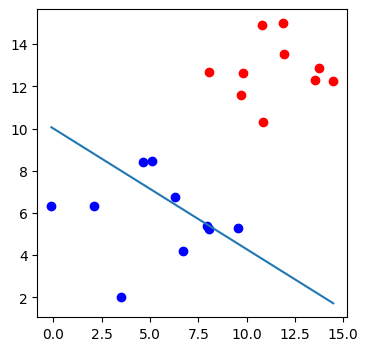

In [153]:
_, ax = plt.subplots(figsize = (4, 4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
draw(x1,x2)
# print(x1,x2)
# plt.plot(x1, x2)
# for i,j in zip(x1, x2):
#     ax.annotate('%s)' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
#     ax.annotate('(%s,' %i, xy=(i,j))
plt.show()

In [154]:
calculate_error(line_parameters, all_pts, y)

matrix([[-0.31787835]])